In [57]:
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib.colors import ListedColormap

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
class Node:
    def __init__(self, dims, min_size, size):
        self.left = None
        self.right = None
        self.min_size = min_size
        self.size = size
        self.x, self.y, self.w, self.h = dims
        self.poss_vals_x = list(range(self.x+min_size, self.x+self.w-min_size)) 
        self.poss_vals_y = list(range(self.y+min_size, self.y+self.h-min_size))

    def split(self):
        self.orient = random.choice([0,1]) # orientation
        if len(self.poss_vals_x) == 0 or len(self.poss_vals_y) == 0: return False
        split_x = random.choice(self.poss_vals_x)
        split_y = random.choice(self.poss_vals_y)
        if self.orient == 0: # x
            self.split_loc = split_x
            
            # left room
            new_x_left = self.x
            new_y_left = self.y 
            new_w_left = self.split_loc - self.x 
            new_h_left = self.h
            dims = (new_x_left, new_y_left, new_w_left, new_h_left)
            self.left = Node(dims, self.min_size, self.size)
            
            # right room
            new_x_right = self.split_loc + 1
            new_y_right = self.y 
            new_w_right = self.size - 1 - self.split_loc
            new_h_right = self.h
            dims = (new_x_right, new_y_right, new_w_right, new_h_right)
            self.right = Node(dims, self.min_size, self.size)
        else:
            self.split_loc = split_y
            
            # left room
            new_x_left = self.x
            new_y_left = self.y 
            new_w_left = self.w
            new_h_left = self.split_loc - self.y
            dims = (new_x_left, new_y_left, new_w_left, new_h_left)
            self.left = Node(dims, self.min_size, self.size)
            
            # right room
            new_x_right = self.x
            new_y_right = self.split_loc + 1 
            new_w_right = self.w
            new_h_right = self.size - 1 - self.split_loc
            dims = (new_x_right, new_y_right, new_w_right, new_h_right)
            self.right = Node(dims, self.min_size, self.size)
        return True
    
    def __repr__(self):
        return f'Node'

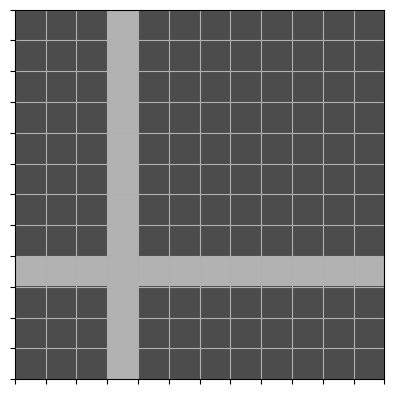

In [77]:
def bsp_grid(size, min_size, num_rooms):
    grid = np.zeros((size, size))

    root = Node((1, 1, 10, 10), min_size, size)
    leaves = [root]
    done = False

    while len(leaves) < num_rooms and not done:
        done = True
        new = []
        for l in leaves:
            if l.left is None and l.right is None:
                if l.split():
                    new.append(l.left)
                    new.append(l.right)
                    done = False
                else:
                    new.append(l)
            else:
                new.append(l)
        leaves = new
    
    node = root
    def update_grid(grid, node):
        if node.left is None and node.right is None:
            return grid
        orient = node.orient
        loc = node.split_loc
        idx = [slice(None)] * grid.ndim
        idx[orient] = loc
        grid[tuple(idx)] = 1
        update_grid(grid, node.left)
        update_grid(grid, node.right)
        return grid
    
    grid = update_grid(grid, node)
    
    cmap = ListedColormap([
        (0.3, 0.3, 0.3),   
        (0.7, 0.7, 0.7)   
    ])

    fig, ax = plt.subplots()

    ax.imshow(grid, cmap=cmap, vmin=0, vmax=1)
    ax.set_xticks(np.arange(-0.5, grid.shape[1], 1))
    ax.set_yticks(np.arange(-0.5, grid.shape[0], 1))
    ax.grid(which="major")
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.show()

    return grid, root

grid, root = bsp_grid(12, 2, 3)

In [1]:
from sparse_generalization.envs.box_world.env import BoxWorldEnv
from minigrid.wrappers import FullyObsWrapper
import gymnasium as gym
import matplotlib.pyplot as plt

gym.register('BoxWorldEnv-v1', BoxWorldEnv)

%load_ext autoreload
%autoreload 2

c:\Users\garga\Documents\Uni\Thesis\sparse-generalization\.venv\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [2]:
size = 15
env = gym.make('BoxWorldEnv-v1', render_mode='rgb_array', unsolvable_prob=0.0, size=size)
env = FullyObsWrapper(env)

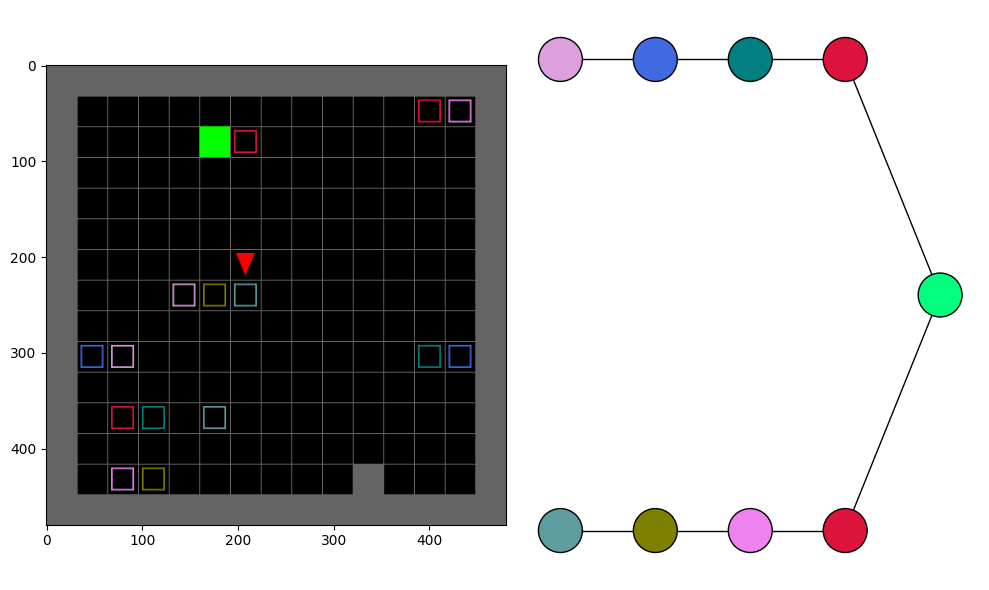

In [5]:
obs, _ = env.reset()
img = env.render()
env.get_wrapper_attr('render_graph')()